# Visualization with Matplotlib

In order to understand and effectively use Matplotlib to make visualizations of data, it's important to understand the parts of a Matplotlib figure object. The code in the cell below is [taken directly from the Matplotlib documentation](https://matplotlib.org/stable/gallery/showcase/anatomy.html), which uses Matplotlib code to create an annotated graph that demonstrates the many facets of a plot. And because the code is provided, it illustrates how to use them. Note that some of the objects and methods used in the code below are things that you might not use regularly (if ever). But many of the methods below will become very familiar to you throughout the rest of the semester and as you use Matplotlib in your research

### __Challenge:__ What is the code below doing?

Execute the Jupyter notebook code below and verify that it produces a plot with a variety of annotations. Then, with a partner, review the lines of the cell and add comments that denote what the line of code does. Also, in the last class when we made our first figure, we used the command `plt.xlabel('Axis label')` command as opposed to the use of the `ax.set_label('Axis label')` in the code below. Why do these two uses differ? 

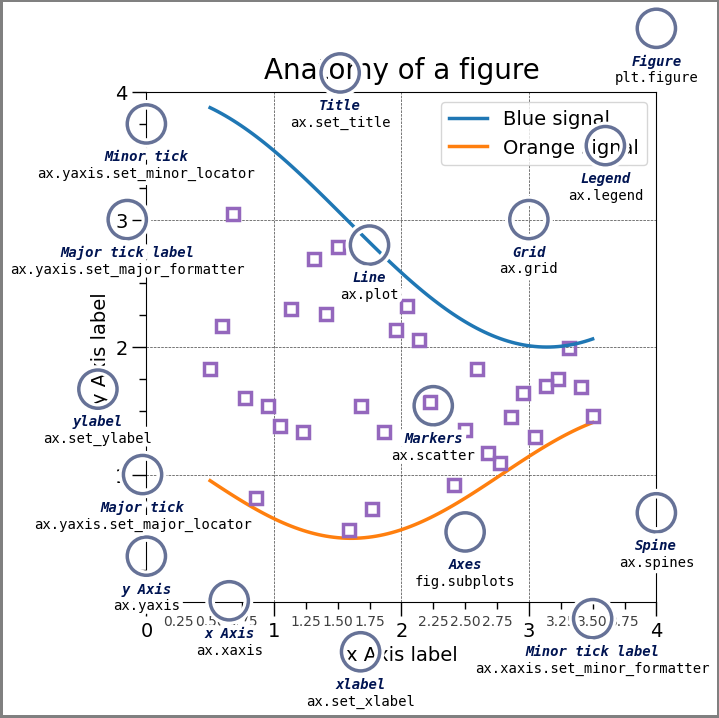

In [29]:
import matplotlib.pyplot as plt #import matplotlib as plt
import numpy as np #import numpy

from matplotlib.patches import Circle #import ability to draw simple circle - note use of from
from matplotlib.patheffects import withStroke #importing a formatting tool?
from matplotlib.ticker import AutoMinorLocator, MultipleLocator #importing some visualization mechanics - controlling tick locations

royal_blue = [0, 20/256, 82/256] #RGB defining a color


# make the figure

np.random.seed(19680801) #setting random seed

X = np.linspace(0.5, 3.5, 100) #independent variable
Y1 = 3+np.cos(X) # one function
Y2 = 1+np.cos(1+X/0.75)/2 #another function
Y3 = np.random.uniform(Y1, Y2, len(X)) # 100 random points between Y1 and Y2

fig = plt.figure(figsize=(7.5, 7.5)) # store fig 
ax = fig.add_axes([0.2, 0.17, 0.68, 0.7], aspect=1) #store ax, so that axes are constant throughout; also define scale of axes

ax.xaxis.set_major_locator(MultipleLocator(1.000)) #where are your major ticks
ax.xaxis.set_minor_locator(AutoMinorLocator(4)) #how many minor ticks
ax.yaxis.set_major_locator(MultipleLocator(1.000)) #where are your major ticks
ax.yaxis.set_minor_locator(AutoMinorLocator(4)) #how many minor ticks
ax.xaxis.set_minor_formatter("{x:.2f}") #float modifier with 2 decimals on x axis

ax.set_xlim(0, 4) #the limits are 0 and also 4
ax.set_ylim(0, 4) #the limits are 0 and surprisingly also 4

ax.tick_params(which='major', width=1.0, length=10, labelsize=14) #major tick size 
ax.tick_params(which='minor', width=1.0, length=5, labelsize=10,
               labelcolor='0.25') #minor tick parameters

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10) #add grid lines

ax.plot(X, Y1, c='C0', lw=2.5, label="Blue signal", zorder=10) #plot the lines
ax.plot(X, Y2, c='C1', lw=2.5, label="Orange signal") #plot the lines
ax.plot(X[::3], Y3[::3], linewidth=0, markersize=9, # plotting scatter plot points, making them purple, and giving them width
        marker='s', markerfacecolor='none', markeredgecolor='C4',
        markeredgewidth=2.5)

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom') #sets title
ax.set_xlabel("x Axis label", fontsize=14) #sets x-label
ax.set_ylabel("y Axis label", fontsize=14) #sets y-label
ax.legend(loc="upper right", fontsize=14) #sets legend


# Annotate the figure

def annotate(x, y, text, code): #what is the function enabling you to do? How is it being used?
    # Circle marker
    c = Circle((x, y), radius=0.15, clip_on=False, zorder=10, linewidth=2.5,
               edgecolor=royal_blue + [0.6], facecolor='none',
               path_effects=[withStroke(linewidth=7, foreground='white')])
    ax.add_artist(c) #defined a standardized circle to use in "annotate"

    # use path_effects as a background for the texts
    # draw the path_effects and the colored text separately so that the
    # path_effects cannot clip other texts
    for path_effects in [[withStroke(linewidth=7, foreground='white')], []]:
        color = 'white' if path_effects else royal_blue
        ax.text(x, y-0.2, text, zorder=100,
                ha='center', va='top', weight='bold', color=color,
                style='italic', fontfamily='monospace',
                path_effects=path_effects)

        color = 'white' if path_effects else 'black'
        ax.text(x, y-0.33, code, zorder=100,
                ha='center', va='top', weight='normal', color=color,
                fontfamily='monospace', fontsize='medium',
                path_effects=path_effects)


annotate(3.5, -0.13, "Minor tick label", "ax.xaxis.set_minor_formatter")
annotate(-0.03, 1.0, "Major tick", "ax.yaxis.set_major_locator")
annotate(0.00, 3.75, "Minor tick", "ax.yaxis.set_minor_locator")
annotate(-0.15, 3.00, "Major tick label", "ax.yaxis.set_major_formatter")
annotate(1.68, -0.39, "xlabel", "ax.set_xlabel")
annotate(-0.38, 1.67, "ylabel", "ax.set_ylabel")
annotate(1.52, 4.15, "Title", "ax.set_title")
annotate(1.75, 2.80, "Line", "ax.plot")
annotate(2.25, 1.54, "Markers", "ax.scatter")
annotate(3.00, 3.00, "Grid", "ax.grid")
annotate(3.60, 3.58, "Legend", "ax.legend")
annotate(2.5, 0.55, "Axes", "fig.subplots")
annotate(4, 4.5, "Figure", "plt.figure")
annotate(0.65, 0.01, "x Axis", "ax.xaxis")
annotate(0, 0.36, "y Axis", "ax.yaxis")
annotate(4.0, 0.7, "Spine", "ax.spines")

# frame around figure
fig.patch.set(linewidth=4, edgecolor='0.5')
plt.show()

## __Challenge:__ Beautify an Intentionally Ugly Graph

The code in the cell below reads in daily average streamflow data for Water Year 2017 (i.e., from 2016-10-01 to 2017-09-30) for one of four gages in the Upper Boise River Basin. It uses the `pandas` library to do so. We'll learn a lot more about `pandas` later, but for now this provides us with the ability to deal with dates and times in a structured way that doesn't require us to format text. 

The cell that follows then creates a very rudimentary (i.e., bad) plot of the streamflow for the water year. Your task as a table, is to use what you learned about Matplotlib figures in the exercise above, and the [Matplotlib documentation](https://matplotlib.org/stable/users/index) (if needed) to create something approaching a "presentation ready" figure for streamflow at your gage. Some minimum characteristics of such a figure include:

- Use of SI units
- Labelled axes
- Clear labeling of what is being plotted (search the web if you need to)
- Legible font sizes

When you're done, create __one__ figure that represents the code of your table and paste the output figure it in [this shared slide deck](https://docs.google.com/presentation/d/1bUpZ3Ms1-QGXGN1pgU7CGhgaOo3ZtHv3ZnWLGHfxvj4/edit?usp=sharing). 


In [ ]:
import pandas as pd # Needed to read data in

table = 2 # Your table

gages = ['13200000', # Mores Creek Above Robie Creek
         '13185000', # Boise River Near Twin Springs
         '13186000', # SF Boise River near Featherville 
         '13192200'  # SF Boise Near Arrowrock Dam
         ]

filename = 'Unit02-data/usgs_streamflow_'+gages[table]+'_dv.csv'

# Use Pandas to read the data into a "DataFrame." More on this later, but think of 
# df below as an object that stores a spreadsheet with columns that have names
df = pd.read_csv(filename)

df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['month_name'] = df['date'].dt.month_name()
display(df)

xlab = df['month_name']
xlab = xlab.unique()
xlab

yticks = np.arange(0,3500,500)

hot_pink = (255, 105, 180)


,date,q_cfs,month,month_name
0,2016-10-01,198.0,10,October
1,2016-10-02,206.0,10,October
2,2016-10-03,209.0,10,October
3,2016-10-04,209.0,10,October
4,2016-10-05,208.0,10,October
...,...,...,...,...
360,2017-09-26,325.0,9,September
361,2017-09-27,323.0,9,September
362,2017-09-28,319.0,9,September
363,2017-09-29,314.0,9,September


KeyError: 'month'

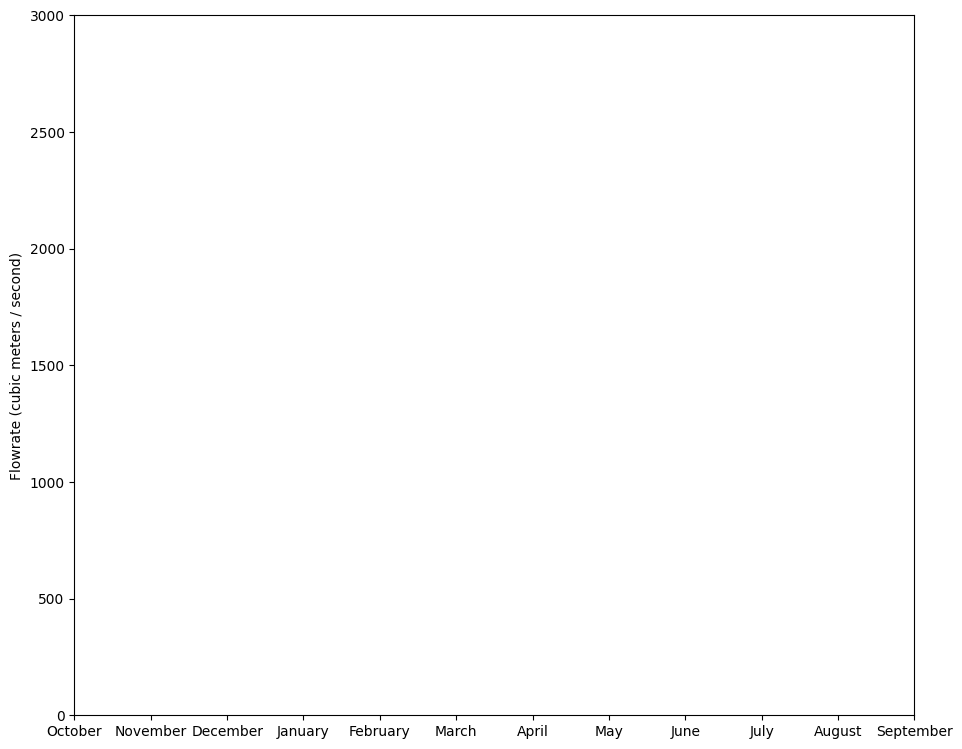

In [ ]:


fig = plt.figure(figsize=(12,10))
ax = fig.add_axes([0.2,0.2, 0.7,0.7])
ax.set_xticks(range(len(xlab)))
ax.set_xticklabels(xlab) # For x-axis tick labels
ax.set_yticks(yticks)
ax.set_yticklabels(yticks) # For y-axis tick labels
#ax.set_xlabel("Water Month (2016-2017)") # For the overall x-axis label
ax.set_ylabel("Flowrate (cubic meters / second)") # For the overall y-axis label
ax.plot(df.date['month'], df.q_cfs/3.2808) #3.2808 CONVERSION FROM CFS TO CMS


fig.patch.set(linewidth=4, edgecolor='0.5')
plt.show()

/tmp/ipykernel_32158/3013664094.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="upper right", fontsize=14) #Setting legend location and font size


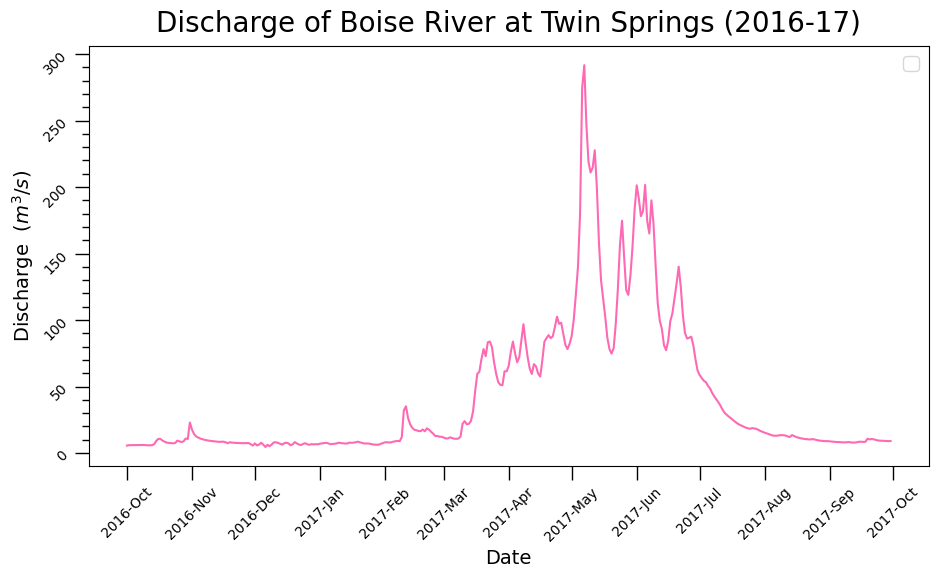

In [51]:
import matplotlib.cbook as cbook
import matplotlib.dates as mdates
fig = plt.figure(figsize=(12, 6)) # Create a figure object
ax = fig.add_axes([0.1, 0.1, 0.7, 0.7]) # Create an axes object with offset and aspect ratio

ax.xaxis.set_major_locator(mdates.MonthLocator()) # Set major ticks for x axis every 1 month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b')) #label dates with YYYY-mm format from mdates
ax.yaxis.set_major_locator(MultipleLocator(50)) # Set major ticks for y axis every 50 unit
ax.yaxis.set_minor_locator(AutoMinorLocator(5)) #Set 5 minor ticks between each major tick for y axis

ax.tick_params(which='major', width=1.0, length=10, labelsize=10, rotation=45) #Setting major tick parameters
ax.tick_params(which='minor', width=1.0, length=5, labelsize=4, #Setting minor tick parameters
               labelcolor='0.25')

ax.set_title("Discharge of Boise River at Twin Springs (2016-17)", fontsize=20, verticalalignment='bottom') #Setting title
ax.set_xlabel("Date", fontsize=14) #Setting x axis label
ax.set_ylabel(r'Discharge $\ (m^3/s)$', fontsize=14) #Setting y axis label
ax.legend(loc="upper right", fontsize=14) #Setting legend location and font size

hot_pink = [255/256, 105/256, 180/256]

ax.plot(df.date, df.q_cfs*0.0283168, color=hot_pink) #Plotting first line and giving it a label, and putting it on top